# Diabetes Prediction
## What is Diabetes?
Diabetes is a chronic disease that occurs when the pancreas is no longer able to make insulin, or when the body cannot make good use of the insulin it produces. Learning how to use Machine Learning can help us predict Diabetes. Let’s get started!

## About this project :- 

- The objective of this project is to classify whether someone has diabetes or not.
- Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)
- The independent variables in this data set are :-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'
- The outcome variable value is either 1 or 0 indicating whether a person has diabetes(1) or not(0).

## About the Dataset

- Pregnancies :- Number of times a woman has been pregnant
- Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose tolerance test
- BloodPressure :- Diastollic Blood Pressure (mm hg)
- SkinThickness :- Triceps skin fold thickness(mm)
- Insulin :- 2 hour serum insulin(mu U/ml)
- BMI :- Body Mass Index ((weight in kg/height in m)^2)
- Age :- Age(years)
- DiabetesPedigreeFunction :-scores likelihood of diabetes based on family history) 
- Outcome :- 0(doesn't have diabetes) or 1 (has diabetes)

# INDEX :- 
**1. Importing Required Libraries**

**2. Loading the Dataset**

**3. Exploratory Data Analysis**

a. Understanding the dataset
- Head of the dataset
- Shape of the data set
- Types of columns
- Information about data set
- Summary of the data set

b. Data Cleaning
- Dropping duplicate values
- Checking NULL values
- Checking for 0 value
         
**4. Data Visualization**
####  Here we are going to plot :-
 - Count Plot :- to see if the dataset is balanced or not
 - Histograms :- to see if data is normally distributed or skewed
 - Box Plot :- to analyse the distribution and see the outliers
 - Scatter plots :- to understand relationship between any two variables
 - Pair plot :- to create scatter plot between all the variables
 
**5. Feature Selection**

**6. Handling Outliers**

**7. Split the Data Frame into X and y**

**8. TRAIN TEST SPLIT**

**9. Build the Classification Algorithm**

9.1  KNN

9.2  Naive Bayes

9.3  SVM

9.4  Decision Tree

9.5  Random Forest

9.6  Logistic Regression

#### The models include the following:- 

  a. Hyper Parameter Tuning using GridSearch CV 
  
  b. Fit Best Model
  
  c. Predict on testing data using that model
  
  d. Performance Metrics :- Confusion Matrix, F1 Score, Precision Score, Recall Score
  

  
# If you like my work, feel free to upvote and comment !
### I'd love to hear your thoughts about this notebook! Constructive Criticism is always welcomed😄 Do share any better method, model or techniques I should try and improvements in this notebook(if any). This is my very first notebook and I hope you like my work ✨ Thankyou for your time🙏


# 1. Import Required Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
import pickle
# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

#Stacking
from mlxtend.classifier import StackingClassifier

# 2. Loading the dataset 

In [3]:
df=pd.read_csv("diabetes.csv")

# 3. Exploratory Data Analysis
## a. Understanding the dataset
- Head of the dataset
- Shape of the data set
- Types of columns
- Information about data set
- Summary of the data set

In [4]:
df.head() #get familier with dataset, display the top 5 data records

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape #getting to know about rows and columns we're dealing with - 768 rows , 9 columns

(768, 9)

In [6]:
df.columns #learning about the columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.dtypes #knowledge of data type helps for computation

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df.info() #Print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe() #helps us to understand how data has been spread across the table.
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### **CONCLUSION** :- We observe that min value of some columns is 0 which cannot be possible medically.Hence in the data cleaning process we'll have to replace them with median/mean value depending on the distribution. Also in the max column we can see insulin levels as high as 846! We have to treat outliers.

## b. Data Cleaning
- Dropping duplicate values
- Checking NULL values
- Checking for 0 value and replacing it :- It isn't medically possible for some data record to have 0 value such as Blood Pressure or Glucose levels. Hence we replace them with the mean value of that particular column.

Read more about this here :- https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4

In [10]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()

In [11]:
#check for missing values, count them and print the sum for every column
df.isnull().sum() #conclusion :- there are no null values in this dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
#checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed in df.describe
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


### NOTE :-
Some of the columns have a skewed distribution, so the mean is more affected by outliers than the median. Glucose and Blood Pressure have normal distributions hence we replace 0 values in those columns by mean value. SkinThickness, Insulin,BMI have skewed distributions hence median is a better choice as it is less affected by outliers.

Refer Histograms down below to see the distribution.

Read more here :- 

https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

https://www.clinfo.eu/mean-median/



In [13]:
#replacing 0 values with median of that column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

# 4. Data Visualization
## Here we are going to plot :-
- Count Plot :- to see if the dataset is balanced or not
- Histograms :- to see if data is normally distributed or skewed
- Box Plot :- to analyse the distribution and see the outliers
- Scatter plots :- to understand relationship between any two variables
- Pair plot :- to create scatter plot between all the variables

<AxesSubplot:xlabel='Outcome', ylabel='count'>

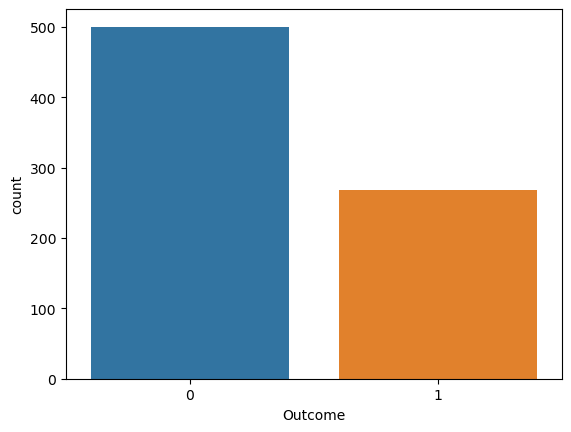

In [14]:
sns.countplot('Outcome',data=df)

### **Conclusion** :- We observe that number of people who do not have diabetes is far more than people who do which indicates that our data is imbalanced.

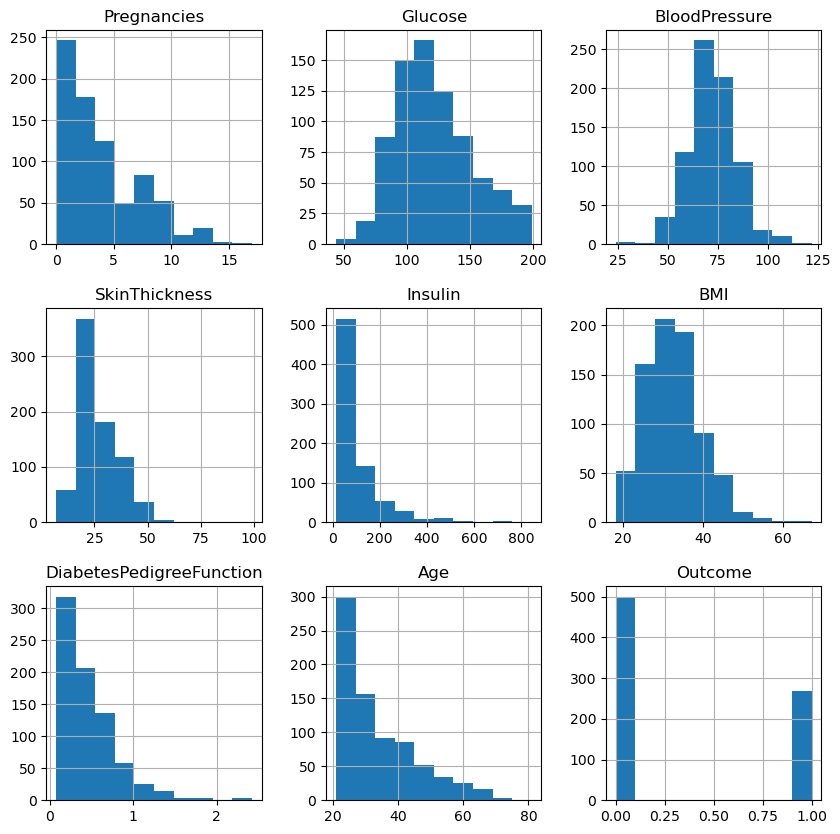

In [15]:
#histogram for each  feature
df.hist(bins=10,figsize=(10,10))
plt.show()

### **Conclusion** :- We observe that only glucose and Blood Pressure are normally distributed rest others are skewed and have outliers

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

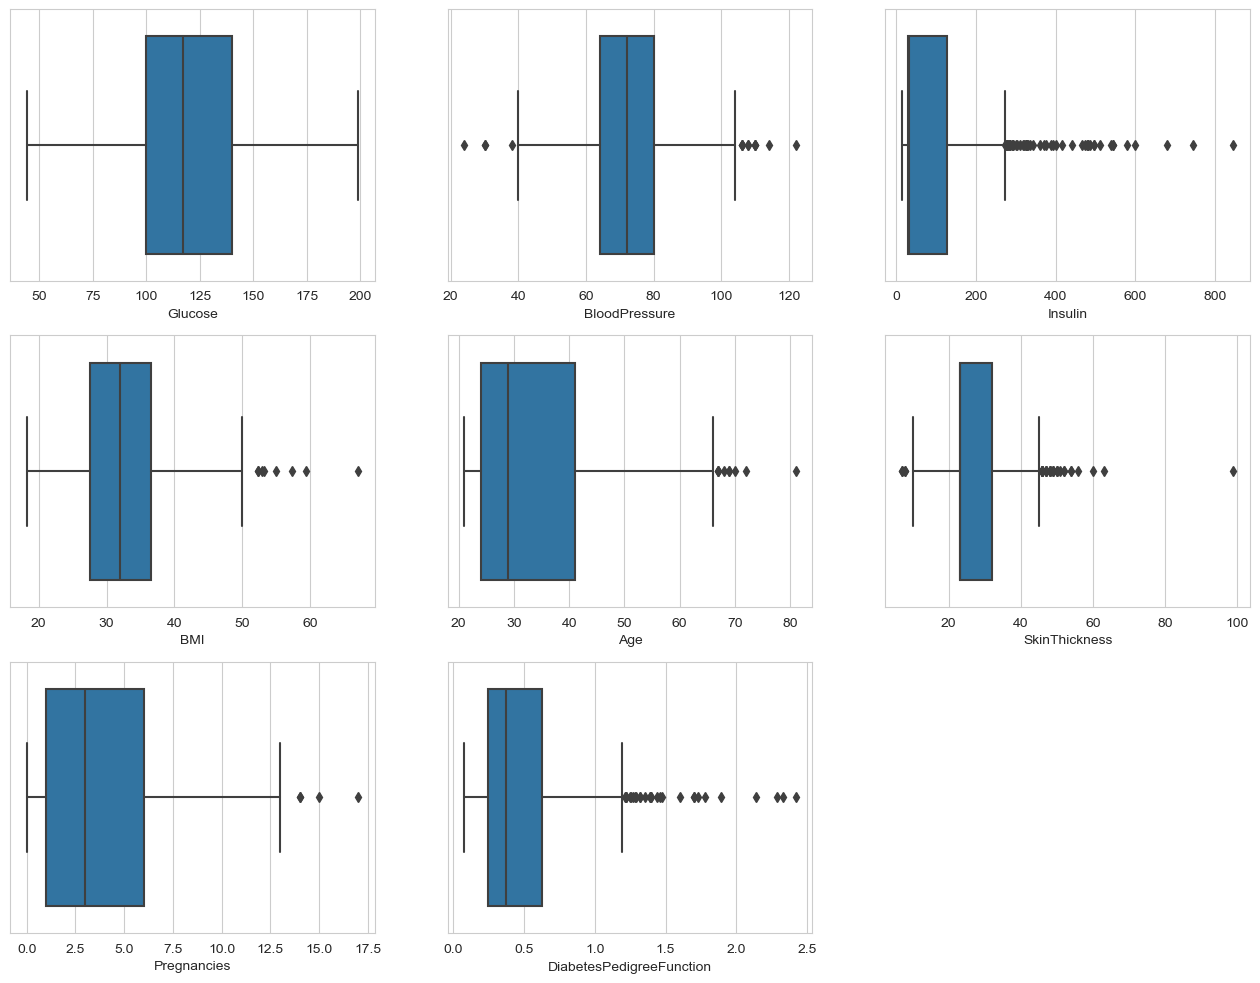

In [16]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Hence it is of utmost importance to deal with them. In this case removing outliers can cause data loss so we have to deal with it using various scaling and transformation techniques.

# 5. Feature Selection

**Pearson's Correlation Coefficient** : Helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

<AxesSubplot:>

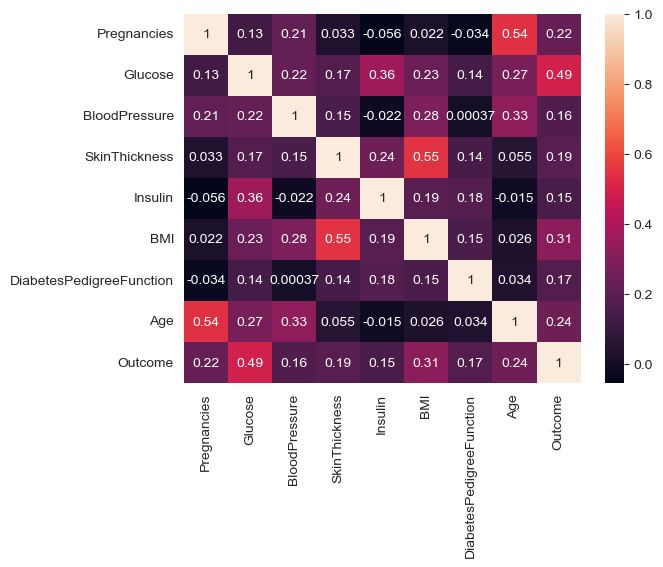

In [17]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

### **CONCLUSION** :- Observe the last row 'Outcome' and note its correlation scores with different features. We can observe that Glucose, BMI and Age are the most correlated with Outcome. BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated, hence they don't contribute much to the model so we can drop them. Read more about this here :- https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e I have used 3'rd technique method mentioned here.

In [18]:
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

# 6. Handling Outliers 

**1 — What is an Outlier?**

An outlier is a data point in a data set that is distant from all other observations.

**2 — How can we Identify an outlier?**

- Using Box plots

- Using Scatter plot

- Using Z score

I've used Box Plots above in data visualization step to detect outliers.

**3 — How am I treating the outliers ?**

Quantile Transformer :- This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme. 

Lets do a simple Standard Scaler vs Quantile Transformation. Given this data set:- 

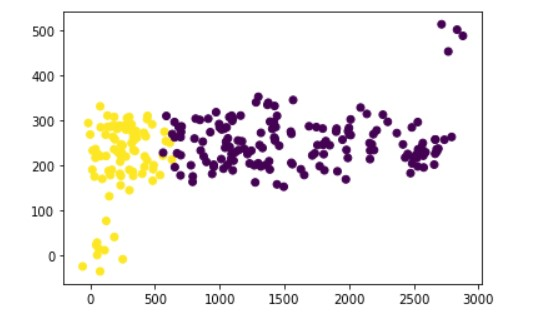

We perform StandardScaler() on this and get

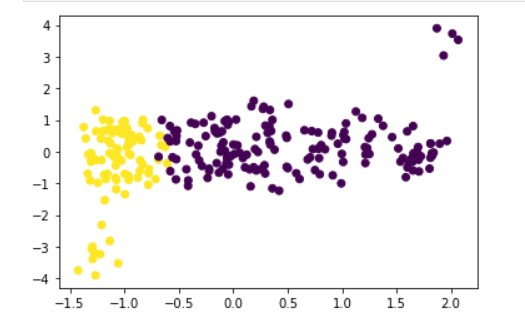

The Y-axis has 8 units whereas X-axis has only 3.5 units, indicating that Outliers have affected the scales

After applying Quantile Transformation , we get 

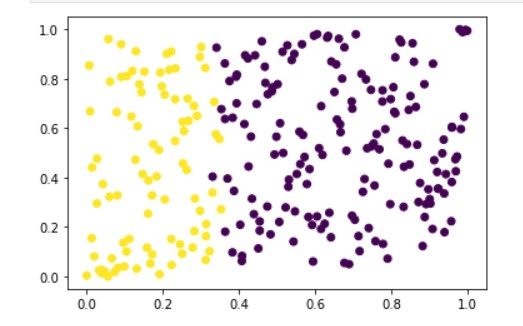

The Y-axis and X-axis are equally scaled. The outliers are still present in this dataset but their impact has been reduced. One of these examples has led me to use this transformer.

Courtesy :- Freecodecamp and CalmCode 

Learn more about it here :- https://www.youtube.com/watch?v=0B5eIE_1vpU , https://www.analyticsvidhya.com/blog/2021/05/feature-scaling-techniques-in-python-a-complete-guide/

In [19]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


<AxesSubplot:xlabel='SkinThickness'>

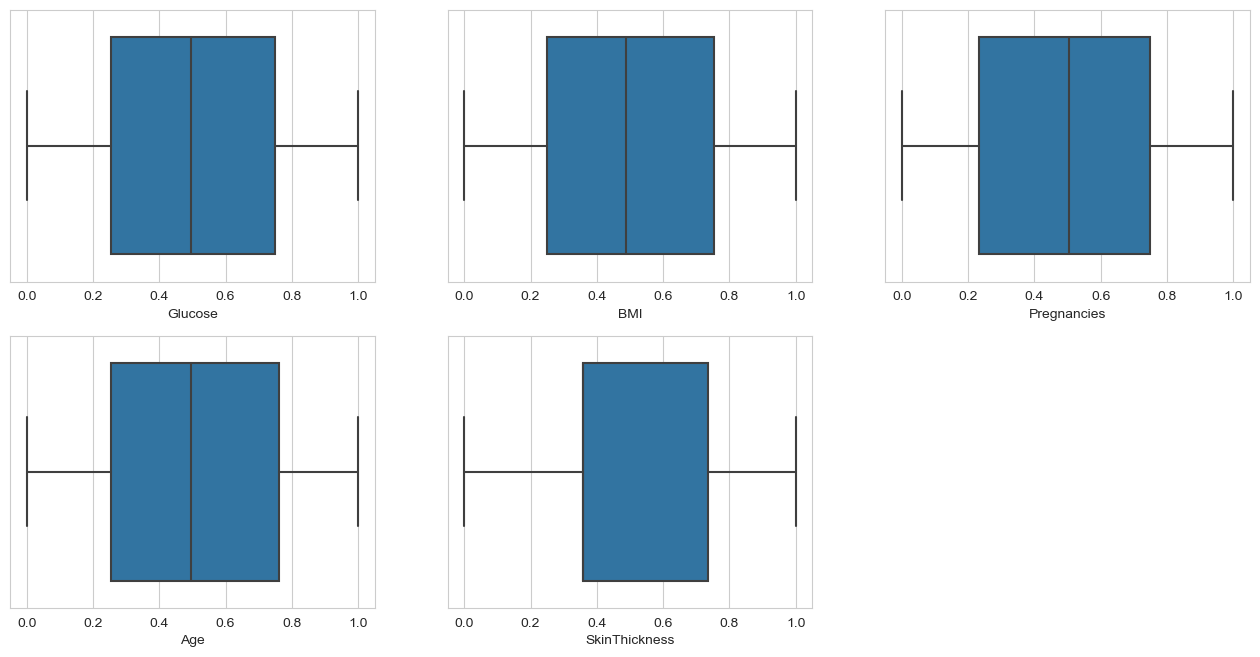

In [20]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)

# 5. Split the Data Frame into X and y

In [21]:

target_name='Outcome'
y= df_new[target_name]#given predictions - training data 
X=df_new.drop(target_name,axis=1)#dropping the Outcome column and keeping all other columns as X



In [22]:
 # contains only independent features 

In [23]:
#contains dependent feature

# 7. TRAIN TEST SPLIT

- The train-test split is a technique for evaluating the performance of a machine learning algorithm.

- Train Dataset: Used to fit the machine learning model.
- Test Dataset: Used to evaluate the fit machine learning model.

- Common split percentages include:

Train: 80%, Test: 20%

Train: 67%, Test: 33%

Train: 50%, Test: 50%

I've used 80% train and 20% test

Read more about it here :- https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)#splitting data in 80% train, 20%test

In [25]:
X_train.shape,y_train.shape

((614, 5), (614,))

In [26]:
X_test.shape,y_test.shape

((154, 5), (154,))

# 9. Classification Algorithms

- KNN
- Naive Bayes
- SVM
- Decision Tree
- Random Forest
- Logistic Regression

### The models include the following:-

#### a. Hyper Parameter Tuning using GridSearch CV

**1. What Is Hyperparameter Tuning?**

Hyperparameters are the variables that the user specify usually while building the Machine Learning model. thus, hyperparameters are specified before specifying the parameters or we can say that hyperparameters are used to evaluate optimal parameters of the model. the best part about hyperparameters is that their values are decided by the user who is building the model. For example, max_depth in Random Forest Algorithms, k in KNN Classifier.
Hyperparameter tuning is the process of tuning the parameters present as the tuples while we build machine learning models. 

**2. What is GridSearch ?**

Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters.

**3. What Steps To Follow For Hyper Parameter Tuning?**

1. Select the type of model we want to use like RandomForestClassifier, regressor or any other model
2. Check what are the parameters of the model
3. Select the methods for searching the hyperparameter
4. Select the cross-validation approach
5. Evaluate the model using the score

#### b. Fit Best Model

#### c. Predict on testing data using that model

#### d. Performance Metrics :- Confusion Matrix, F1 Score, Precision Score, Recall Score
**Confusion Matrix**
It is a tabular visualization of the model predictions versus the ground-truth labels. 

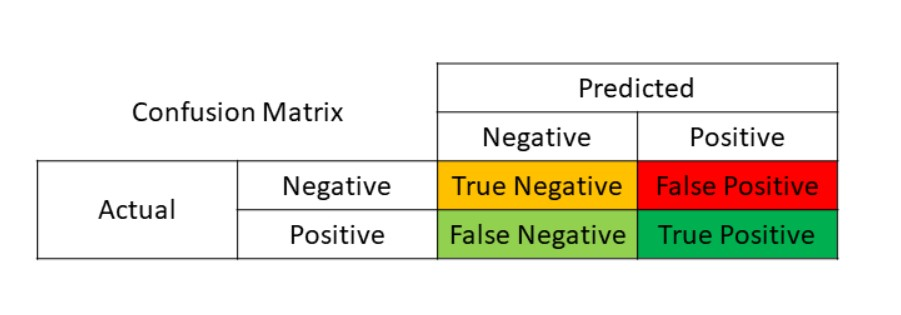

**F1 Score :-**
It’s the harmonic mean between precision and recall. 

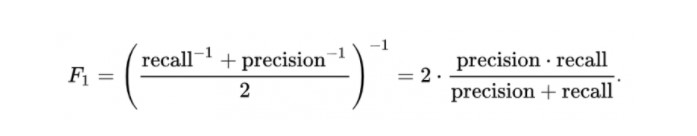

**Precision Score**
Precision is the fraction of predicted positives/negatives events that are actually positive/negatives.

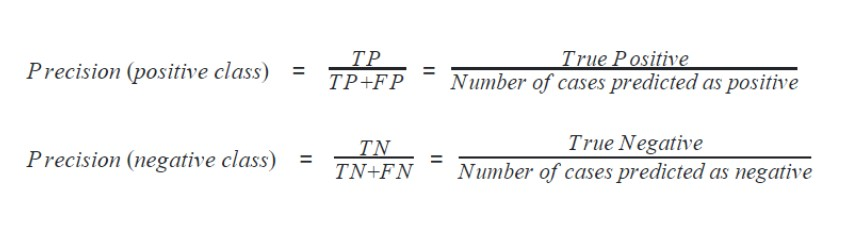


**Recall Score**
It is the fraction of positives/negative events that you predicted correctly. 

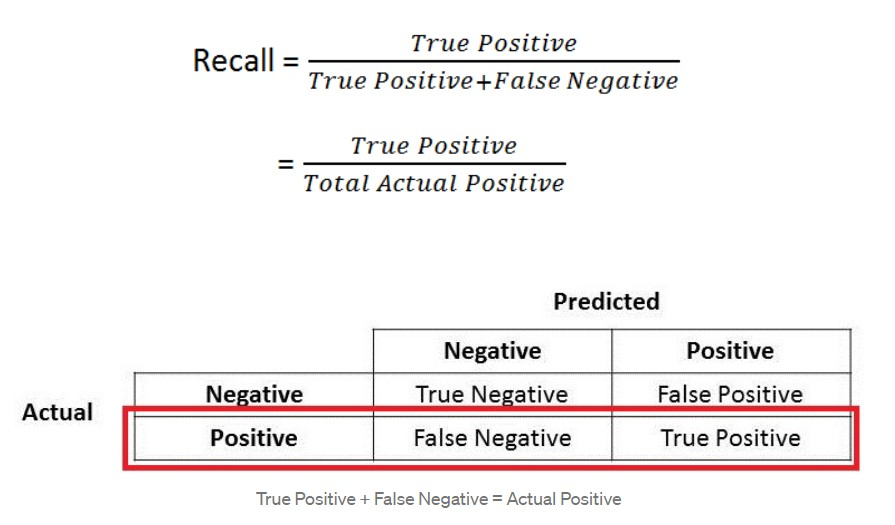

#### I've given preference to F1 Scoring because :- 

1. When you have a small positive class, then F1 score makes more sense.In this case the positive class number is almost half of the negative class.

2. F1-score is a better metric when there are imbalanced classes as in the above case.

3. F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall

Reference :- https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/



In [27]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [28]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
filename='Diabetes_logreg.sav'
logreg_eval = evaluate_model(logreg, X_test, y_test)
pickle.dump(logreg, open(filename, 'wb'))
# Print result
print('Accuracy:', logreg_eval['acc'])
print('Precision:', logreg_eval['prec'])
print('Recall:', logreg_eval['rec'])
print('F1 Score:', logreg_eval['f1'])
print('Cohens Kappa Score:', logreg_eval['kappa'])
print('Area Under Curve:', logreg_eval['auc'])
print('Confusion Matrix:\n', logreg_eval['cm'])

Accuracy: 0.7922077922077922
Precision: 0.6923076923076923
Recall: 0.574468085106383
F1 Score: 0.627906976744186
Cohens Kappa Score: 0.48548757569429946
Area Under Curve: 0.8558361503280971
Confusion Matrix:
 [[95 12]
 [20 27]]


In [29]:
# Building a model using KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)


knn_eval = evaluate_model(knn, X_test, y_test)
filename='Diabetes_knn.sav'
pickle.dump(knn, open(filename, 'wb'))
# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.7792207792207793
Precision: 0.6511627906976745
Recall: 0.5957446808510638
F1 Score: 0.6222222222222222
Cohens Kappa Score: 0.4666938276634752
Area Under Curve: 0.8304831974547624
Confusion Matrix:
 [[92 15]
 [19 28]]


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree

dt = DecisionTreeClassifier(random_state=42)

clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
filename='Diabetes_clf.sav'
# Evaluate Model
clf_eval = evaluate_model(clf, X_test, y_test)
#pickle.dump(clf, open(filename, 'wb'))

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])# Evaluate Model

Accuracy: 0.7272727272727273
Precision: 0.5454545454545454
Recall: 0.6382978723404256
F1 Score: 0.5882352941176471
Cohens Kappa Score: 0.3862212943632568
Area Under Curve: 0.7023265062636707
Confusion Matrix:
 [[82 25]
 [17 30]]


In [31]:
'''from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier(n_estimators = 20)

featuresSize = features.__len__()
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    
# Building and fitting my_forest
forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
my_forest = forest.fit(X_train, y_train)
forest_eval = evaluate_model(forest, X_test, y_test)
filename='Diabetes_forest.sav'
pickle.dump(forest, open(filename, 'wb'))
# Print result
print('Accuracy:', forest_eval['acc'])
print('Precision:',forest_eval['prec'])
print('Recall:', forest_eval['rec'])
print('F1 Score:', forest_eval['f1'])
print('Cohens Kappa Score:', forest_eval['kappa'])
print('Area Under Curve:', forest_eval['auc'])
print('Confusion Matrix:\n', forest_eval['cm'])'''

'from sklearn.model_selection import GridSearchCV\n\nforest = RandomForestClassifier(n_estimators = 20)\n\nfeaturesSize = features.__len__()\nparam_dist = {"max_depth": [3, None],\n              "max_features": randint(1, featuresSize),\n              "min_samples_split": randint(2, 9),\n              "min_samples_leaf": randint(1, 9),\n              "criterion": ["gini", "entropy"]}\n    \n# Building and fitting my_forest\nforest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)\nmy_forest = forest.fit(X_train, y_train)\nforest_eval = evaluate_model(forest, X_test, y_test)\nfilename=\'Diabetes_forest.sav\'\npickle.dump(forest, open(filename, \'wb\'))\n# Print result\nprint(\'Accuracy:\', forest_eval[\'acc\'])\nprint(\'Precision:\',forest_eval[\'prec\'])\nprint(\'Recall:\', forest_eval[\'rec\'])\nprint(\'F1 Score:\', forest_eval[\'f1\'])\nprint(\'Cohens Kappa Score:\', forest_eval[\'kappa\'])\nprint(\'Area Under Cur

In [32]:
# bagging
bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
bag.fit(X_train, y_train)

bag_eval = evaluate_model(bag, X_test, y_test)
filename='Diabetes_bag.sav'
pickle.dump(bag, open(filename, 'wb'))
# Print result
print('Accuracy:', bag_eval['acc'])
print('Precision:',bag_eval['prec'])
print('Recall:', bag_eval['rec'])
print('F1 Score:', bag_eval['f1'])
print('Cohens Kappa Score:', bag_eval['kappa'])
print('Area Under Curve:', bag_eval['auc'])
print('Confusion Matrix:\n', bag_eval['cm'])    

Accuracy: 0.7727272727272727
Precision: 0.6304347826086957
Recall: 0.6170212765957447
F1 Score: 0.6236559139784946
Cohens Kappa Score: 0.4608921784356871
Area Under Curve: 0.8337641678266057
Confusion Matrix:
 [[90 17]
 [18 29]]


In [33]:
# boosting
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
boost.fit(X_train, y_train)

boost_eval = evaluate_model(boost, X_test, y_test)
filename='Diabetes_boost.sav'
pickle.dump(boost, open(filename, 'wb'))
# Print result
print('Accuracy:', boost_eval['acc'])
print('Precision:',boost_eval['prec'])
print('Recall:', boost_eval['rec'])
print('F1 Score:', boost_eval['f1'])
print('Cohens Kappa Score:', boost_eval['kappa'])
print('Area Under Curve:', boost_eval['auc'])
print('Confusion Matrix:\n', boost_eval['cm']) 

Accuracy: 0.7662337662337663
Precision: 0.6222222222222222
Recall: 0.5957446808510638
F1 Score: 0.608695652173913
Cohens Kappa Score: 0.442141275910646
Area Under Curve: 0.8027440843109962
Confusion Matrix:
 [[90 17]
 [19 28]]


In [34]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
stack = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)
stack.fit(X_train, y_train)

stack_eval = evaluate_model(stack, X_test, y_test)
filename='Diabetes_stack.sav'
pickle.dump(stack, open(filename, 'wb'))
# Print result
print('Accuracy:', stack_eval['acc'])
print('Precision:',stack_eval['prec'])
print('Recall:', stack_eval['rec'])
print('F1 Score:', stack_eval['f1'])
print('Cohens Kappa Score:', stack_eval['kappa'])
print('Area Under Curve:', stack_eval['auc'])
print('Confusion Matrix:\n', stack_eval['cm']) 

Accuracy: 0.7727272727272727
Precision: 0.62
Recall: 0.6595744680851063
F1 Score: 0.6391752577319586
Cohens Kappa Score: 0.4735299863254542
Area Under Curve: 0.7917080930602507
Confusion Matrix:
 [[88 19]
 [16 31]]


## 9.2 Naive Bayes :-

Naive Bayes is classification approach that adopts the principle of class conditional independence from the Bayes Theorem. This means that the presence of one feature does not impact the presence of another in the probability of a given outcome, and each predictor has an equal effect on that result

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [36]:
best_model= nbModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [37]:
nb_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       107
         1.0       0.64      0.53      0.58        47

    accuracy                           0.77       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.76      0.77      0.76       154


 F1:
 0.5813953488372093

 Precision score is:
 0.6410256410256411

 Recall score is:
 0.5319148936170213

 Confusion Matrix:



<AxesSubplot:>

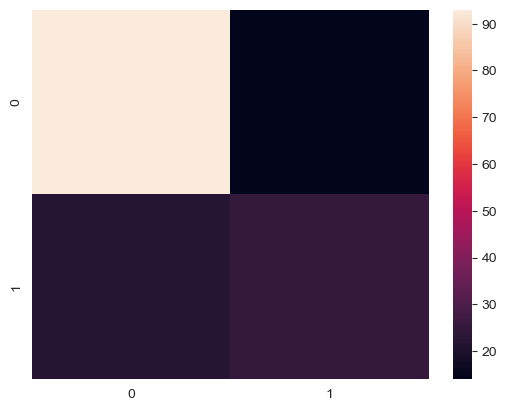

In [38]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred))

# 9.3 Support Vector Machine :- 

It is typically leveraged for classification problems, constructing a hyperplane where the distance between two classes of data points is at its maximum. This hyperplane is known as the decision boundary, separating the classes of data points (e.g., has diabetes vs doesn't have diabetes ) on either side of the plane.

In [39]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

In [40]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [41]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [ ]:
grid_result = grid_search.fit(X, y)

In [ ]:
svm_pred=grid_result.predict(X_test)

In [ ]:
print("Classification Report is:\n",classification_report(y_test,svm_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,svm_pred))

In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(10)
fig.set_figwidth(24)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.1
clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1'], clf_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
logreg_score = [logreg_eval['acc'], logreg_eval['prec'], logreg_eval['rec'], logreg_eval['f1'], logreg_eval['kappa']]
forest_score = [forest_eval['acc'], forest_eval['prec'], forest_eval['rec'], forest_eval['f1'], forest_eval['kappa']]
bag_score = [bag_eval['acc'], bag_eval['prec'], bag_eval['rec'], bag_eval['f1'], bag_eval['kappa']]
boost_score = [boost_eval['acc'], boost_eval['prec'], boost_eval['rec'], boost_eval['f1'], boost_eval['kappa']]
stack_score = [stack_eval['acc'], stack_eval['prec'], stack_eval['rec'], stack_eval['f1'], stack_eval['kappa']]
## Set position of bar on X axis
r1 = np.arange(len(clf_score))
r2 = [x + barWidth for x in r1]
r3= [x + barWidth for x in r2]
r4=[x + barWidth for x in r3]
r5=[x + barWidth for x in r4]
r6=[x + barWidth for x in r5]
r7=[x + barWidth for x in r6]
## Make the plot
ax1.bar(r1, clf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r3, logreg_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r4, forest_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r5, bag_score, width=barWidth, edgecolor='white', label='Bagging')
ax1.bar(r6, boost_score, width=barWidth, edgecolor='white', label='Boosting')
ax1.bar(r7, stack_score, width=barWidth, edgecolor='white', label='Stacking')
## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(logreg_eval['fpr'], logreg_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(logreg_eval['auc']))
ax2.plot(forest_eval['fpr'], forest_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(forest_eval['auc']))
ax2.plot(bag_eval['fpr'], bag_eval['tpr'], label='Bagging, auc = {:0.5f}'.format(bag_eval['auc']))
ax2.plot(boost_eval['fpr'], boost_eval['tpr'], label='Boosting, auc = {:0.5f}'.format(boost_eval['auc']))
ax2.plot(stack_eval['fpr'], stack_eval['tpr'], label='Stacking, auc = {:0.5f}'.format(stack_eval['auc']))
## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()